# Real-Time Communication System Powered by AI for Specially Abled
## CNN Model for Image Prediction
### Team ID: PNT2022TMID35896

#### 1. Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2

import os

import string

from tensorflow.keras.preprocessing import image, sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten,Dropout

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from skimage.transform import resize

#### 2. Load the DataSet

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='6QrLb6q71Hov_g_B6ve_HNmYNdwA47WLnJYET6GsGT0w',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'ibm35896-donotdelete-pr-axaddldubdtuf0'
object_key = 'Dataset.zip'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [3]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_4.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [4]:
DataSet = r'''/home/wsuser/work/Dataset/Gesture Image Data'''

In [5]:
# splitfolders.ratio(DataSet,output='''/home/wsuser/work/Dataset/SplitD''',ratio=(.8,0,.2),group_prefix=None)

#### 3. Image Preprocessing
##### 3.1 Import ImageDataGenerator Library 

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

##### 3.2. Apply ImageDataGenerator functionality

In [7]:
x_train = train_datagen.flow_from_directory('Dataset/SplitD/train', target_size=(50,50),
                                            class_mode='categorical', batch_size=300, color_mode="rgb")

Found 44400 images belonging to 37 classes.


In [8]:
x_test = test_datagen.flow_from_directory('Dataset/SplitD/test', target_size=(50,50),
                                            class_mode='categorical', batch_size=300, color_mode="rgb")

Found 11100 images belonging to 37 classes.


In [9]:
x_train.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35,
 '_': 36}

#### 4. Model Building
##### 4.1 Initialize the model

In [10]:
model=Sequential()

##### 4.2 Add the Convolution Layer

In [11]:
model.add(Convolution2D(filters=32, kernel_size=(3,3), input_shape=(50,50,3), activation='relu'))

##### 4.3 Add the Pooling Layer

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Dropout(0.25))

##### 4.2 Add the Convolution Layer

In [14]:
model.add(Convolution2D(64,(3,3), activation='relu'))

##### 4.3 Add the Pooling Layer

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Dropout(0.25))

##### 4.2 Add the Convolution Layer

In [17]:
model.add(Convolution2D(128,(3,3), activation='relu'))

##### 4.3 Add the Pooling Layer

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Dropout(0.25))

##### 4.2 Add the Convolution Layer

In [20]:
model.add(Convolution2D(256,(3,3), activation='relu'))

##### 4.3 Add the Pooling Layer

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Dropout(0.25))

##### 4.4 Add the Flatten Layer

In [23]:
model.add(Flatten())

##### 4.5 Add the Dense Layer

In [24]:
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
# model.add(Dense(100, activation='relu'))

In [25]:
model.add(Dense(37, activation='softmax'))

##### 4.6 Compile the Model

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

##### 4.7 Fit the Model

In [28]:
epo=2
history = model.fit(x_train, steps_per_epoch=len(x_train), epochs=epo, validation_data=x_test, validation_steps=len(x_test))

Epoch 1/2
148/148 [==============================] - 658s 4s/step - loss: 1.7382 - accuracy: 0.4377 - val_loss: 0.5117 - val_accuracy: 0.8359
Epoch 2/2
148/148 [==============================] - 656s 4s/step - loss: 0.4329 - accuracy: 0.8454 - val_loss: 0.1641 - val_accuracy: 0.9522


##### 4.8 Save the Model

In [29]:
model.save('aslpng1_3.h5')

In [30]:
!tar -zcvf ASL-Communication-Model_3.tgz aslpng1_3.h5

aslpng1_3.h5


#### 5.Test the Model
##### 5.1 Load the Saved Model

In [31]:
model=load_model('aslpng1_3.h5')

##### 5.2 Pre-Process it and Predict

In [32]:
def detect(frame):
    img=resize(frame,(50,50,3))
    img=np.expand_dims(img,axis=0)
    if(np.max(img)>1):
        img=img/255.0
    prediction=model.predict(img)
    # print(frame)
    print(frame.shape)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    # print(prediction)
    prediction=np.argmax(model.predict(img),axis=1) #model.predict_classes(img)
    print(prediction)
    return prediction

(50, 50)
[16]


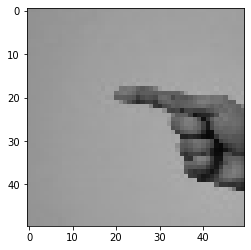

In [51]:
frame=cv2.imread('''/home/wsuser/work/Dataset/SplitD/test/G/28.jpg''', 0)
data=detect(frame)

(50, 50, 3)
[16]


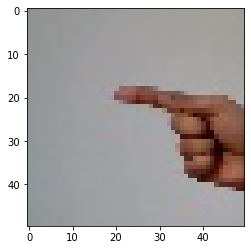

In [50]:
frame=cv2.imread('''/home/wsuser/work/Dataset/SplitD/test/G/28.jpg''')
data=detect(frame)

In [35]:
!pip install watson-machine-learning-client

In [36]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"lSCpOt-YyJjqz1UsS4Tjycg5_dKbTt3ATzIdAQN26W6u"
}
client=APIClient(wml_credentials)
client

In [37]:
def guid_space_name(client,ASL_Communication_3):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==ASL_Communication_3)['metadata']['id'])

In [38]:
space_uid=guid_space_name(client,'ASL_Communication_3')
print("Space UID "+space_uid)

Space UID 008edc54-c5ea-4437-a833-055f8a68d7de


In [39]:
client.set.default_space(space_uid)

'SUCCESS'

In [40]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [41]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [42]:
ls

ASL-Communication-Model_1.tgz  aslpng1_1.h5  Dataset/
ASL-Communication-Model_3.tgz  aslpng1_3.h5


In [43]:
model_details=client.repository.store_model(model='ASL-Communication-Model_3.tgz', meta_props={
    client.repository.ModelMetaNames.NAME:"ASL Model Building",
    client.repository.ModelMetaNames.TYPE: "TENSORFLOW_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_space_uid
})

In [44]:
model_id=client.repository.get_model_id(model_details)
model_id

'ab920c3a-1d6f-4826-86e0-f40757ae3c77'

In [45]:
client.repository.download(model_id, 'ASL_Model_3.tar.gz')

Successfully saved model content to file: 'ASL_Model_3.tar.gz'


'/home/wsuser/work/ASL_Model_3.tar.gz'